In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [31]:
sentences = [
    "artificial intelligence is transforming how we interact with technology.",
    "machine learning algorithms can identify patterns in large datasets.",
    "neural networks are inspired by the human brain structure.",
    "deep learning models require significant computational resources.",
    "natural language processing enables computers to understand human speech.",
    "computer vision allows machines to interpret and analyze images.",
    "robotics combines artificial intelligence with mechanical engineering.",
    "autonomous vehicles use sensors and machine learning for navigation.",
    "chatbots powered by artificial intelligence provide customer support.",
    "reinforcement learning teaches agents through trial and error rewards.",
    "generative artificial intelligence can create text images and music.",
    "supervised learning requires labeled data for model training.",
    "unsupervised learning discovers hidden patterns without labels.",
    "transfer learning applies knowledge from one domain to another.",
    "artificial intelligence ethics addresses bias and fairness concerns.",
    "predictive analytics uses machine learning to forecast future outcomes.",
    "speech recognition converts spoken language into written text.",
    "recommendation systems use algorithms to suggest relevant content.",
    "artificial intelligence is revolutionizing healthcare diagnostics.",
    "edge computing brings machine learning processing closer to devices."
]

In [32]:
def get_vocab(data):
    i = 1
    word2index = dict()
    index2word = dict()
    temp = set()
    for sentence in sentences:
        for word in sentence.split():
            if word not in temp:
                temp.add(word)
                word2index[word] = i
                index2word[i] = word
                i += 1 
    return i , word2index, index2word
vocab_size, word2index, index2word = get_vocab(sentences)

In [33]:
word2index['intelligence']

2

In [34]:
index2word[4]

'transforming'

In [36]:
def prev_words(sentence , index , window_size):
    prev = []
    for i in range(index - window_size , index):
        if i >= 0:
            prev.append(word2index[sentence[i]])
        else:
            prev.append(0)
    return prev


def next_words(sentence , index , window_size):
    next = []
    for i in range(index + 1 , index + window_size + 1):
        if i < len(sentence):
            next.append(word2index[sentence[i]])
        else:
            next.append(0)
    return next


def get_training_data(sentences , window_size):
    x = []
    y = []
    for sentence in sentences:
        xi = []
        yi = []
        sentence = sentence.split()
        for index , word in enumerate(sentence):
            prev = prev_words(sentence , index , window_size//2)
            next = next_words(sentence , index , window_size//2)
            assert len(prev) == len(next)
            xi.append(prev + next)
            yi.append(word2index[word])
        x.extend(xi)
        y.extend(yi)
    return x , y    
window_size = 5 
x , y = get_training_data(sentences , window_size)

In [37]:
[index2word[i] for i in x[24]]

['by', 'the', 'brain', 'structure.']

In [38]:
index2word[25]

'human'

In [39]:
model = tf.keras.Sequential()


In [40]:
embed_size = 2
model.add(tf.keras.layers.Embedding(vocab_size , embed_size , input_length = window_size - 1))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(vocab_size , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy')

C:\Users\bipin\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
x = np.array(x , dtype = np.int32)
y = np.array(y , dtype = np.int32)
model.fit(x , y , epochs = 50 , batch_size = 64)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.3469
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3453
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3437
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3421
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3405
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3389
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3373
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3358
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3341 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3325
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3310
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3294
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3277
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3262
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3246
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━

In [51]:
word = "intelligence"
input_vec = tf.convert_to_tensor([word2index[word]])
model.get_layer('embedding_4')(input_vec).numpy().tolist()

[[-1.5330265760421753, 0.6793861389160156]]

In [52]:
word_vec = []
for word , word_index in word2index.items():
    input_vec = tf.convert_to_tensor([word2index[word]])
    emb = model.get_layer('embedding_4')(input_vec).numpy().tolist()[0]
    word_vec.append((word , emb))
    

In [56]:
word_vec[4]

('how', [-0.016037017107009888, -0.09183913469314575])

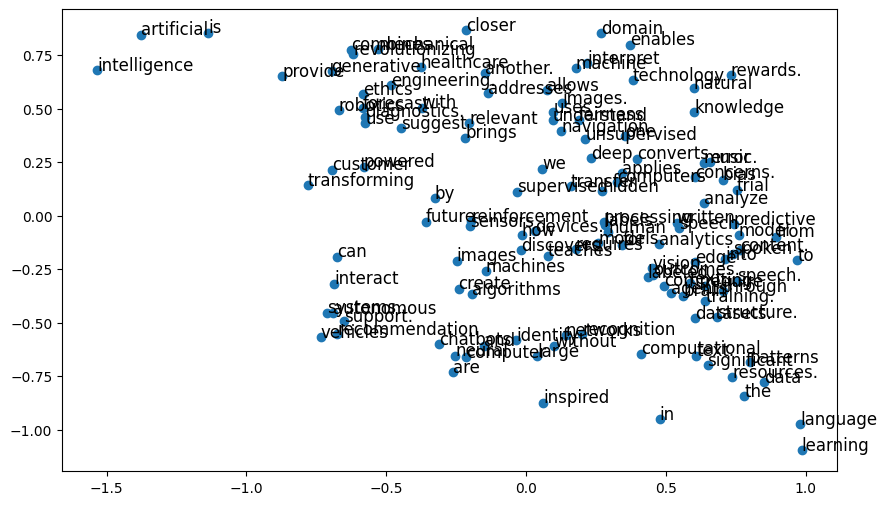

In [58]:
plt.figure(figsize=(10 ,6))
plt.scatter([i[1][0] for i in word_vec] , [i[1][1] for i in word_vec])
for item in word_vec:
    word = item[0]
    plt.text(item[1][0] , item[1][1] , word , fontdict = {'fontsize':12})
plt.show()